In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import math
import seaborn as sns

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>

In [2]:
class FuzzyRecommendationModel:
    
    def __init__(self, input_age, input_height, input_weight, input_pal, input_state = "SYMPTOMATIC", input_gender = "MALE", input_disease="Malaria"):
        self.input_age = input_age
        self.input_height = input_height
        self.input_weight = input_weight
        self.input_pal = input_pal
        self.input_state = input_state
        self.input_gender = input_gender
        self.input_bmi = 0
        self.input_disease = input_disease

    
    
    
    

    """ Daily energy needs for HIV/AIDS patients """
    
    def daily_energy_needs(self):
        age = self.input_age
        weight = self.input_weight
        height = self.input_height
        pal = self.input_pal
        gender = self.input_gender
        state = self.input_state


        SYMPTOMATIC = 'SYMPTOMATIC' 
        ASYMPTOMATIC = 'ASYMPTOMATIC'
        
        if(self.input_disease == "HIV"):

            #def bmr_and_pal_computation(gender)

            if( gender == 'MALE'):

                BMR = 10*weight + 6.25*height - 5*age + 5

                if (pal == 'Very Light'):
                    pal = 1.30 
                elif (pal == 'Light'):
                    pal = 1.30 
                elif (pal == 'Moderate'):
                    pal = 1.76  
                elif (pal == 'Heavy'):
                    pal = 2.10

            if (gender == 'FEMALE'):
                BMR = 10*weight + 6.25*height - 5*age - 161
                if (pal == 'Very Light'):
                    pal = 1.30 
                elif (pal == 'Light'):
                    pal = 1.55 
                elif (pal == 'Moderate'):
                    pal = 1.70  
                elif (pal == 'Heavy'):
                    pal = 2.00

            if state == SYMPTOMATIC:
                Energy = math.floor(BMR*pal + (BMR*pal)*25/100)
                print("Daily Energy needs: \n", Energy)
            else:
                Energy = math.floor(BMR*pal + (BMR*pal)*10/100)
                print("Daily Energy needs: \n", Energy)
        if(self.input_disease == "MALARIA"):

            #def bmr_and_pal_computation(gender)

            if( gender == 'MALE'):

                BMR = 10*weight + 6.25*height - 5*age + 5

                if (pal == 'Very Light'):
                    pal = 1.30 
                elif (pal == 'Light'):
                    pal = 1.30 
                elif (pal == 'Moderate'):
                    pal = 1.76  
                elif (pal == 'Heavy'):
                    pal = 2.10


                Energy = BMR*pal
                print("Daily Energy needs: \n", Energy)

            if (gender == 'FEMALE'):
                BMR = 10*weight + 6.25*height - 5*age - 161
                if (pal == 'Very Light'):
                    pal = 1.30 
                elif (pal == 'Light'):
                    pal = 1.55 
                elif (pal == 'Moderate'):
                    pal = 1.70  
                elif (pal == 'Heavy'):
                    pal = 2.00


                Energy = BMR*pal
                print("Daily Energy needs: \n",Energy)


    """ Daily energy needs computation """
    
    #daily_energy_needs(input_age, input_weight, input_height, input_pal, input_gender, input_state)
    
    
    
    def fuzzy_model(self):
        """ Fuzzy logic Model Part """
    
        # New Antecedent/Consequent objects hold universe variables and membership
        # functions

        x_age = np.arange(0, 61, 1)
        x_bmi = np.arange(0, 51, 1)
        x_pal = np.arange(1, 6, 1)

        x_energy = np.arange(0, 601, 1)
        x_protein = np.arange(0, 41, 1)
        x_fat = np.arange(0, 41, 1)
        x_carbs = np.arange(0, 51, 1)
        x_fe = np.arange(0, 11, 1)


        # Antecendents definition

        age = ctrl.Antecedent(np.arange(0, 61, 1), 'age')
        bmi = ctrl.Antecedent(np.arange(0, 51, 1), 'bmi')
        pal = ctrl.Antecedent(np.arange(1, 6, 1), 'pal')
        
        
        # Consequents definition
        energy = ctrl.Consequent(np.arange(0, 601, 1), 'energy', defuzzify_method='mom')
        protein = ctrl.Consequent(np.arange(0, 41, 1), 'protein', defuzzify_method='mom')
        fat = ctrl.Consequent(np.arange(0, 41, 1), 'fat', defuzzify_method='mom')
        carbs = ctrl.Consequent(np.arange(0, 51, 1), 'carbs', defuzzify_method='mom')
        fe = ctrl.Consequent(np.arange(0, 11, 1), 'fe', defuzzify_method='mom')


        # Membership functions definition

        # Age Membership function

        age['young'] = fuzz.trimf(age.universe, [0, 0, 21])
        age['adult'] = fuzz.trimf(age.universe, [18, 40, 55])
        age['old'] = fuzz.trimf(age.universe, [50, 60, 60])

        # BMI Membership function
        bmi['underweight'] = fuzz.trimf(bmi.universe, [0, 0, 18 ])
        bmi['normal'] = fuzz.trimf(bmi.universe, [17, 18, 25 ])
        bmi['overweight'] = fuzz.trimf(bmi.universe, [18, 25, 30 ])
        bmi['obese type 1'] = fuzz.trimf(bmi.universe, [25, 30, 35 ])
        bmi['obese type 2'] = fuzz.trimf(bmi.universe, [30, 35, 40 ])
        bmi['obese type 3'] = fuzz.trimf(bmi.universe, [35, 50, 50 ])

        # PAL Membership function
        
        pal['very light'] = fuzz.smf(pal.universe, 0, 1 )
        pal['light'] = fuzz.smf(pal.universe, 1,  2 )
        pal['moderate'] = fuzz.smf(pal.universe, 2, 3)
        pal['heavy'] = fuzz.smf(pal.universe, 3, 4 )
        
        pal.view()
        bmi.view()
        age.view()
       
        
        # Energy Membership function

        energy['low'] = fuzz.trimf(energy.universe, [0, 0, 150 ])
        energy['medium'] = fuzz.trimf(energy.universe, [0, 150, 250])
        energy['high'] = fuzz.trimf(energy.universe, [200, 600, 600 ])

        # Protein Membership function
        protein['low'] = fuzz.trimf(protein.universe, [0, 0,  10])
        protein['medium'] = fuzz.trimf(protein.universe, [0, 8, 25])
        protein['high'] = fuzz.trimf(protein.universe, [20, 40, 40 ])

        # Fat Membership function
        fat['low'] = fuzz.trimf(fat.universe, [0, 0,  3])
        fat['medium'] = fuzz.trimf(fat.universe, [0, 3,  20])
        fat['high'] = fuzz.trimf(fat.universe, [18, 40,  40])

        # Carbs Membership function
        carbs['low'] = fuzz.trimf(carbs.universe, [0, 0,  15])
        carbs['medium'] = fuzz.trimf(carbs.universe, [0, 15,  35])
        carbs['high'] = fuzz.trimf(carbs.universe, [30, 50,  50])

        # Iron Membership function
        fe['low'] = fuzz.trimf(fe.universe, [0, 0,  2])
        fe['medium'] = fuzz.trimf(fe.universe, [0, 2,  6])
        fe['high'] = fuzz.trimf(fe.universe, [5, 10,  10])

        energy.view()
        protein.view()
        fat.view()
        carbs.view()
        fe.view()
        # Visualisations of the output membership function
        
        #energy.view()
        #protein.view()
        #fat.view()
        #carbs.view()
        #fe.view()

        """ Fuzzy rules definition """

        if(self.input_disease =="HIV"):

            # Young 
            
        
            rule1 = ctrl.Rule(bmi['underweight'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule2 = ctrl.Rule(bmi['normal'],
                (energy['medium'], protein['high'],carbs['medium'] , fat['medium'], fe['medium']))
            
            rule3 = ctrl.Rule(bmi['normal'],
                (energy['medium'], protein['high'],carbs['medium'] , fat['medium'], fe['medium']))
            
            rule4 = ctrl.Rule(bmi['overweight'],
                (energy['medium'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule5 = ctrl.Rule(bmi['obese type 1'],
                (energy['medium'], protein['medium'], carbs['low'] , fat['low'], fe['low']))
            
            rule6 = ctrl.Rule(bmi['obese type 2'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['low']))
            
            rule7 = ctrl.Rule(bmi['obese type 3'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['low']))
            
            # Two parameters
            
            # young
            rule8 = ctrl.Rule(age['young'] & bmi['underweight'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule9 = ctrl.Rule(age['young'] & bmi['normal'],
                (energy['high'], protein['high'],carbs['high'] , fat['medium'], fe['high']))
            
            rule10 = ctrl.Rule(age['young'] & bmi['overweight'],
                (energy['medium'], protein['medium'],carbs['medium'] , fat['low'], fe['medium']))
            
            rule11 = ctrl.Rule(age['young'] & bmi['obese type 1'],
                (energy['medium'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule12 = ctrl.Rule(age['young'] & bmi['obese type 2'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule13 = ctrl.Rule(age['young'] & bmi['obese type 3'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            # Adult
            
            rule14 = ctrl.Rule(age['adult'] & bmi['underweight'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule15 = ctrl.Rule(age['adult'] & bmi['normal'],
                (energy['high'], protein['high'],carbs['high'] , fat['medium'], fe['high']))
            
            rule16 = ctrl.Rule(age['adult'] & bmi['overweight'],
                (energy['medium'], protein['medium'],carbs['medium'] , fat['low'], fe['medium']))
            
            rule17 = ctrl.Rule(age['adult'] & bmi['obese type 1'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule18 = ctrl.Rule(age['adult'] & bmi['obese type 2'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule19 = ctrl.Rule(age['young'] & bmi['obese type 3'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            
            # Old
            
            rule20 = ctrl.Rule(age['adult'] & bmi['underweight'],
                (energy['high'], protein['high'],carbs['low'] , fat['low'], fe['high']))
            
            rule21 = ctrl.Rule(age['adult'] & bmi['normal'],
                (energy['medium'], protein['medium'],carbs['low'] , fat['low'], fe['high']))
            
            rule22 = ctrl.Rule(age['adult'] & bmi['overweight'],
                (energy['medium'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            rule23 = ctrl.Rule(age['adult'] & bmi['obese type 1'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['low']))
            
            rule24 = ctrl.Rule(age['adult'] & bmi['obese type 2'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['medium']))
            
            rule25 = ctrl.Rule(age['young'] & bmi['obese type 3'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
        
        
            
            # Three parameters
             #pal['very light'] = fuzz.smf(pal.universe, 0, 1 )
            #pal['light'] = fuzz.smf(pal.universe, 1,  2 )
            #pal['moderate'] = fuzz.smf(pal.universe, 2, 3)
            #pal['heavy'] = fuzz.smf(pal.universe, 3, 4 )
            
            # young
            
            rule26 = ctrl.Rule(age['young'] & bmi['underweight'] & pal['very light'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule27 = ctrl.Rule(age['young'] & bmi['normal'] & pal['very light'],
                (energy['high'], protein['high'],carbs['high'] , fat['medium'], fe['high']))
            
            rule28 = ctrl.Rule(age['young'] & bmi['overweight'] & pal['very light'],
                (energy['medium'], protein['medium'],carbs['low'] , fat['low'], fe['medium']))
            
            rule29 = ctrl.Rule(age['young'] & bmi['obese type 1'] & pal['very light'],
                (energy['medium'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule30 = ctrl.Rule(age['young'] & bmi['obese type 2'] & pal['very light'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule31 = ctrl.Rule(age['young'] & bmi['obese type 3'] & pal['very light'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            # Adult
            
            rule32 = ctrl.Rule(age['adult'] & bmi['underweight'] & pal['very light'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule33 = ctrl.Rule(age['adult'] & bmi['normal'] & pal['very light'],
                (energy['high'], protein['high'], carbs['low'] , fat['medium'], fe['high']))
            
            rule34 = ctrl.Rule(age['adult'] & bmi['overweight'] & pal['very light'],
                (energy['medium'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule35 = ctrl.Rule(age['adult'] & bmi['obese type 1'] & pal['very light'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule36 = ctrl.Rule(age['adult'] & bmi['obese type 2'] & pal['very light'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['medium']))
            
            rule37 = ctrl.Rule(age['young'] & bmi['obese type 3'] & pal['very light'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            # Heavy PAL case
            
            rule38 = ctrl.Rule(age['adult'] & bmi['underweight'] & pal['heavy'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule39 = ctrl.Rule(age['adult'] & bmi['normal'] & pal['heavy'],
                (energy['high'], protein['high'], carbs['medium'] , fat['medium'], fe['high']))
            
            rule40 = ctrl.Rule(age['adult'] & bmi['overweight'] & pal['heavy'],
                (energy['medium'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule41 = ctrl.Rule(age['adult'] & bmi['obese type 1'] & pal['heavy'],
                (energy['low'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule42 = ctrl.Rule(age['adult'] & bmi['obese type 2'] & pal['heavy'],
                (energy['low'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule43 = ctrl.Rule(age['young'] & bmi['obese type 3'] & pal['heavy'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            # End Heavy PAL case
            

        if(self.input_disease =="MALARIA"):
            
            #Fuzzy malaria rules her
             # Young 
            
        
            rule1 = ctrl.Rule(bmi['underweight'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule2 = ctrl.Rule(bmi['normal'],
                (energy['medium'], protein['high'],carbs['medium'] , fat['medium'], fe['high']))
            
            rule3 = ctrl.Rule(bmi['normal'],
                (energy['medium'], protein['high'],carbs['medium'] , fat['medium'], fe['high']))
            
            rule4 = ctrl.Rule(bmi['overweight'],
                (energy['medium'], protein['medium'], carbs['medium'] , fat['low'], fe['high']))
            
            rule5 = ctrl.Rule(bmi['obese type 1'],
                (energy['medium'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule6 = ctrl.Rule(bmi['obese type 2'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['high']))
            
            rule7 = ctrl.Rule(bmi['obese type 3'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['high']))
            
            # Two parameters
            
            # young
            rule8 = ctrl.Rule(age['young'] & bmi['underweight'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule9 = ctrl.Rule(age['young'] & bmi['normal'],
                (energy['high'], protein['high'],carbs['high'] , fat['medium'], fe['high']))
            
            rule10 = ctrl.Rule(age['young'] & bmi['overweight'],
                (energy['medium'], protein['medium'],carbs['medium'] , fat['low'], fe['high']))
            
            rule11 = ctrl.Rule(age['young'] & bmi['obese type 1'],
                (energy['medium'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule12 = ctrl.Rule(age['young'] & bmi['obese type 2'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule13 = ctrl.Rule(age['young'] & bmi['obese type 3'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['high']))
            
            # Adult
            
            rule14 = ctrl.Rule(age['adult'] & bmi['underweight'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule15 = ctrl.Rule(age['adult'] & bmi['normal'],
                (energy['high'], protein['high'],carbs['high'] , fat['medium'], fe['high']))
            
            rule16 = ctrl.Rule(age['adult'] & bmi['overweight'],
                (energy['medium'], protein['medium'],carbs['medium'] , fat['low'], fe['high']))
            
            rule17 = ctrl.Rule(age['adult'] & bmi['obese type 1'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule18 = ctrl.Rule(age['adult'] & bmi['obese type 2'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule19 = ctrl.Rule(age['young'] & bmi['obese type 3'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['high']))
            
            
            # Old
            
            rule20 = ctrl.Rule(age['adult'] & bmi['underweight'],
                (energy['high'], protein['high'],carbs['low'] , fat['low'], fe['high']))
            
            rule21 = ctrl.Rule(age['adult'] & bmi['normal'],
                (energy['medium'], protein['medium'],carbs['low'] , fat['low'], fe['high']))
            
            rule22 = ctrl.Rule(age['adult'] & bmi['overweight'],
                (energy['medium'], protein['low'],carbs['low'] , fat['low'], fe['high']))
            
            rule23 = ctrl.Rule(age['adult'] & bmi['obese type 1'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['high']))
            
            rule24 = ctrl.Rule(age['adult'] & bmi['obese type 2'],
                (energy['low'], protein['low'], carbs['low'] , fat['low'], fe['high']))
            
            rule25 = ctrl.Rule(age['young'] & bmi['obese type 3'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['high']))
        
        
            
            # Three parameters
             #pal['very light'] = fuzz.smf(pal.universe, 0, 1 )
            #pal['light'] = fuzz.smf(pal.universe, 1,  2 )
            #pal['moderate'] = fuzz.smf(pal.universe, 2, 3)
            #pal['heavy'] = fuzz.smf(pal.universe, 3, 4 )
            
            # young
            
            rule26 = ctrl.Rule(age['young'] & bmi['underweight'] & pal['very light'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule27 = ctrl.Rule(age['young'] & bmi['normal'] & pal['very light'],
                (energy['high'], protein['high'],carbs['high'] , fat['medium'], fe['high']))
            
            rule28 = ctrl.Rule(age['young'] & bmi['overweight'] & pal['very light'],
                (energy['medium'], protein['medium'],carbs['low'] , fat['low'], fe['high']))
            
            rule29 = ctrl.Rule(age['young'] & bmi['obese type 1'] & pal['very light'],
                (energy['medium'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule30 = ctrl.Rule(age['young'] & bmi['obese type 2'] & pal['very light'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule31 = ctrl.Rule(age['young'] & bmi['obese type 3'] & pal['very light'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['high']))
            
            # Adult
            
            rule32 = ctrl.Rule(age['adult'] & bmi['underweight'] & pal['very light'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule33 = ctrl.Rule(age['adult'] & bmi['normal'] & pal['very light'],
                (energy['high'], protein['high'], carbs['low'] , fat['medium'], fe['high']))
            
            rule34 = ctrl.Rule(age['adult'] & bmi['overweight'] & pal['very light'],
                (energy['medium'], protein['medium'], carbs['medium'] , fat['low'], fe['high']))
            
            rule35 = ctrl.Rule(age['adult'] & bmi['obese type 1'] & pal['very light'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule36 = ctrl.Rule(age['adult'] & bmi['obese type 2'] & pal['very light'],
                (energy['low'], protein['medium'], carbs['low'] , fat['low'], fe['high']))
            
            rule37 = ctrl.Rule(age['young'] & bmi['obese type 3'] & pal['very light'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['high']))
            
           # Heavy PAL case
            
            rule38 = ctrl.Rule(age['adult'] & bmi['underweight'] & pal['heavy'],
                (energy['high'], protein['high'],carbs['high'] , fat['high'], fe['high']))
            
            rule39 = ctrl.Rule(age['adult'] & bmi['normal'] & pal['heavy'],
                (energy['high'], protein['high'], carbs['medium'] , fat['medium'], fe['high']))
            
            rule40 = ctrl.Rule(age['adult'] & bmi['overweight'] & pal['heavy'],
                (energy['medium'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule41 = ctrl.Rule(age['adult'] & bmi['obese type 1'] & pal['heavy'],
                (energy['low'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule42 = ctrl.Rule(age['adult'] & bmi['obese type 2'] & pal['heavy'],
                (energy['low'], protein['medium'], carbs['medium'] , fat['low'], fe['medium']))
            
            rule43 = ctrl.Rule(age['young'] & bmi['obese type 3'] & pal['heavy'],
                (energy['low'], protein['low'],carbs['low'] , fat['low'], fe['medium']))
            
            # End Heavy PAL case


        nutrient_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11
                                           , rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21
                                           , rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31
                                           , rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41
                                        ,rule42, rule43])

        system = ctrl.ControlSystemSimulation(nutrient_ctrl)



        """ Dish database preprocessing """

        df = pd.read_csv('Foods_Composition_French.csv', sep = ',')


        columns_to_drop = ['0','Usual names', 'Water(g)','Crude fibre (g)','Zn (mg)','Mg (mg)','Type', 'Main Ingredients','Ash (g)', 'K (mg)', 'Na (mg)','Ca (mg)','Se (mg)','P (mg)', 'Mn (mg)', 'Cu (mg)']
        new_df = df.drop(columns_to_drop, axis=1)

        #Converting string to integer
        df['Available carbohydrates (g)'] = pd.to_numeric(df['Available carbohydrates (g)'])
        df['Energy (kcal)'] = pd.to_numeric(df['Energy (kcal)'])
        df['Water(g)'] = pd.to_numeric(df['Water(g)'])
        df['Protein N x 6.25 (g)'] = pd.to_numeric(df['Protein N x 6.25 (g)'])
        df['Total fat (g)'] = pd.to_numeric(df['Total fat (g)'])
        df['Crude fibre (g)'] = pd.to_numeric(df['Crude fibre (g)'])
        df['Fe (mg)'] = pd.to_numeric(df['Fe (mg)'])
        df['Zn (mg)'] = pd.to_numeric(df['Zn (mg)'])
        df['Mg (mg)'] = pd.to_numeric(df['Mg (mg)'])




        # Filling empty variables

        new_df = new_df.fillna(0)

        # Converting dataframe to array

        df_arr = new_df.reset_index().values
        dataset = df_arr
        
        if(self.input_pal == "Very  Light"):
            real_pal = 1
        elif(self.input_pal == "Light"):
            real_pal = 2
        elif(self.input_pal == "Moderate"):
            real_pal = 3
        else:
            real_pal = 4
            
        # Getting the neighbrs
        def get_neighbors(train, test_row, num_neighbors):

            # calculate the Euclidean distance between two vectors
            def euclidean_distance(row1, row2):
                distance = 0.0
                for i in range(len(row1)-1):
                    distance += (row1[i] - row2[i])**2
                return math.sqrt(distance)

            distances = list()
            for train_row in train:
                dist = euclidean_distance(test_row, train_row[1:])
                distances.append((train_row, dist))
            distances.sort(key=lambda tup: tup[1])
            neighbors = list()

            for i in range(num_neighbors):
                neighbors.append(distances[i][0])
            return neighbors
        
        
        # Retrieving plate using index   
        def find_by_index(index, df):
            return df._get_value(index, 'Usual names')
    
        # BMI Computation
    
        def bmi_computation(self, input_weight, input_height):
            self.input_bmi = self.input_weight/((self.input_height)/100)**2
            return self.input_bmi
        
        bmi = bmi_computation(self, self.input_weight, self.input_height)
        
        system.input['age'] = self.input_age
        system.input['bmi'] = bmi
        system.input['pal'] = real_pal
        

        print("input bmi is: ", bmi)

        # Crunch the numbers
        system.compute()

        nutrients_values = []

        nutrients_values.append(system.output['energy'])
        nutrients_values.append(system.output['protein'])
        nutrients_values.append(system.output['fat'])
        nutrients_values.append(system.output['carbs'])
        nutrients_values.append(system.output['fe'])
        
        nutrient_values_ceiled = np.ceil(nutrients_values)
        
        print("Nutrients values from fuzzy logic model :\n", nutrient_values_ceiled)

        voisins = get_neighbors(dataset, nutrients_values, 4)

        for val in voisins:
            print("Recommended dish list: ",find_by_index(val[0], df))

Daily Energy needs: 
 1777.75


C:\Users\Sepele\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sepele\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sepele\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sepele\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sepele\anaconda3\lib\site-packages\skfuzzy\control\fuzz

input bmi is:  22.22222222222222
Nutrients values from fuzzy logic model :
 [141.  10.   1.  16.  10.]
Recommended dish list:  Macabo rape/arachide
Recommended dish list:  Plantain-porridge
Recommended dish list:  Corn chaff
Recommended dish list:  Gniri/Lalo


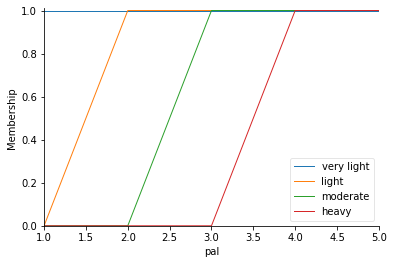

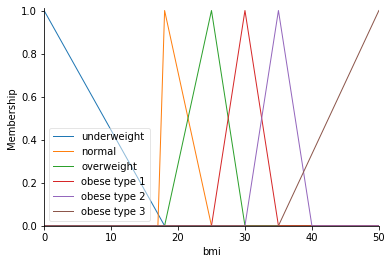

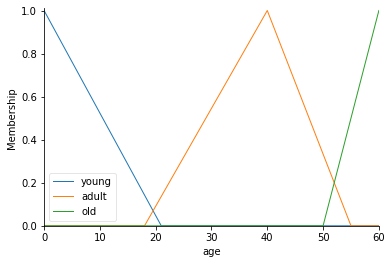

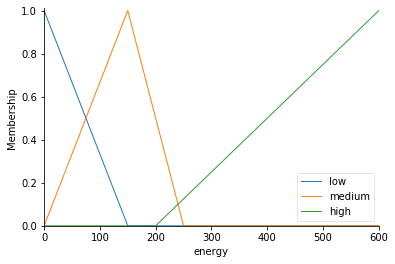

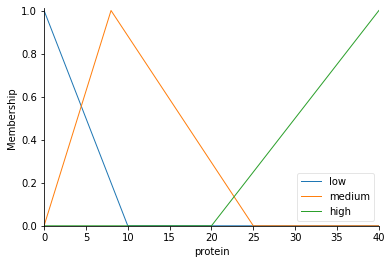

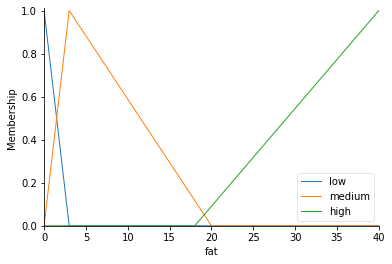

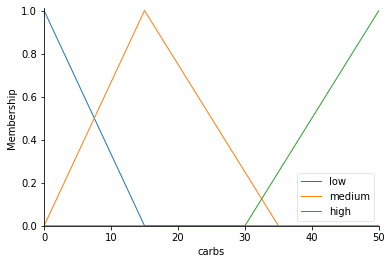

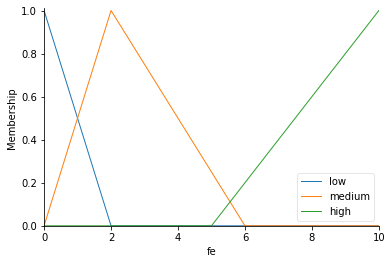

In [3]:
#input_age, input_height, input_weight, input_pal, input_state = "SYMPTOMATIC", input_gender = "MALE", input_disease

M1 = FuzzyRecommendationModel(15, 150, 50, 'Light', "", "MALE", "MALARIA")

M1.daily_energy_needs()
M1.fuzzy_model()



In [5]:
 df = pd.read_csv('Foods_Composition_French.csv', sep = ',')

In [17]:
df.tail()

,0,Usual names,Type,Main Ingredients,Energy (kcal),Water(g),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Crude fibre (g),...,Fe (mg),Zn (mg),Mg (mg),Ca (mg),P (mg),Cu (mg),Mn (mg),K (mg),Na (mg),Se (mg)
112,113,Ragoût de tomates,s,"Tomate fraîche, oignon, poisson frais, ail, hu...",193,74.8,4.30,19.40,0.90,0.50,...,0.10,0.10,9.0,5.0,46.0,NaN,0.0,NaN,NaN,NaN
113,114,Sauce jaune,s,"Huile de palme, bouillon de viande, épices loc...",144,83.4,0.10,16.00,0.40,0.00,...,0.00,0.00,1.0,4.0,2.0,NaN,0.0,NaN,NaN,NaN
114,115,Zom-non-salé,s,"Feuille de myrtille, arachide, noix de palme, ...",156,74.8,5.33,13.04,2.68,3.51,...,2.28,0.68,61.0,NaN,NaN,0.21,NaN,NaN,NaN,NaN
115,116,Zom-sale,s,"Feuille de myrtille, arachide, huile de palme,...",132,76.6,5.08,10.53,2.36,3.72,...,2.78,0.69,54.0,NaN,NaN,0.16,NaN,NaN,NaN,NaN
116,117,Zou'tchou'nè,m,"Haricot rouge, tubercule d'igname, huile de pa...",195,59.3,5.29,8.88,21.78,3.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[df["Usual names"] == "Poumseing-kodok"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
91,Poumseing-kodok,m,"Haricot rouge, légume, maïs, banane, huile de ...",195,5.26,7.26,26.11,NaN


In [15]:
df.loc[df["Usual names"] == "Poumseing-djap"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
89,Poumseing-djap,m,"Haricot rouge, légume, maïs, banane, huile de ...",190,3.7,7.78,25.44,NaN


In [16]:
df.loc[df["Usual names"] == "Corn / groundnut-pudding"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
10,Corn / groundnut-pudding,sn,"Farine de maïs, arachide grillée, épices",180,7.5,11.4,16.5,1.4


In [18]:


df.loc[df["Usual names"] == "Zou'tchou'nè"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
116,Zou'tchou'nè,m,"Haricot rouge, tubercule d'igname, huile de pa...",195,5.29,8.88,21.78,NaN


## First HIV test case

In [43]:
df.loc[df["Usual names"] == "Eru/fufu"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
17,Eru/fufu,m,"Pâte de manioc fermentée, feuille de Gnetum af...",46,2.01,1.81,4.32,1.2


In [22]:
df.loc[df["Usual names"] == "Bouillie-infantile 1"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
3,Bouillie-infantile 1,m,"Farine de maïs, sucre, lait, arachide, jaune d...",51,0.77,0.38,11.86,NaN


In [24]:
df.loc[df["Usual names"] == "Bouillie infantile 2"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
4,Bouillie infantile 2,m,"Pâte de maïs, sucre, lait, arachide, jaune d'œuf",48,0.7,0.3,11.4,NaN


In [28]:
df.loc[df["Usual names"] == "Bouillie-maÏs"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
2,Bouillie-maÏs,"m, sn","Farine de maïs, arachide grillée, sucre, extra...",64,0.95,0.44,13.97,NaN


## Second HIV test case

In [29]:
df.loc[df["Usual names"] == "Igname-malaxé"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
34,Igname-malaxé,m,"Tubercule d'igname, tomate, papier, ail, herbe...",110,3.37,3.93,13.59,0.73


In [30]:
df.loc[df["Usual names"] == "Couscous/gombo"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
12,Couscous/gombo,m,"Maïs, tomate, gombo, herbes vertes, ail, poivr...",108,2.92,4.02,13.55,0.54


In [32]:
df.loc[df["Usual names"] == "Koki/plantain"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
39,Koki/plantain,m,"Niébé, huile de palme rouge, poivre, sel, banane",107,2.48,4.11,13.13,1.6


In [33]:
df.loc[df["Usual names"] == "Kwem/manioc"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
42,Kwem/manioc,m,"Feuille de manioc, noix de palme fraîche, tube...",118,2.32,4.88,15.55,0.91


## First test case Malaria

In [34]:
df.loc[df["Usual names"] == "Kon"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
40,Kon,s,"Haricot rouge, huile de palme, tomate, sel, po...",161,7.38,7.05,15.15,2.24


In [35]:
df.loc[df["Usual names"] == "Corn chaff"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
9,Corn chaff,m,"Grains de maïs, haricot rouge, huile de palme,...",149,3.76,5.65,20.29,1.95


In [36]:
df.loc[df["Usual names"] == "Site-sembun-bo-kenà"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
102,Site-sembun-bo-kenà,m,"Arachide, tubercule de manioc, huile de palme,...",150,2.59,6.86,19.04,NaN


In [37]:
df.loc[df["Usual names"] == "Mbedi 2"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
51,Mbedi 2,m,"Feuille de manioc, tubercule de manioc, arachi...",159,2.92,6.67,21.87,1.9


## Second test case Malaria

In [38]:
df.loc[df["Usual names"] == "Nnam-Ongoualik"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
72,Nnam-Ongoualik,sn,"Graine d'Egusi, poisson fumé, sel, poivre",324,14.83,21.89,8.58,3.28


In [40]:
df.loc[df["Usual names"] == "Ragoût de poulet"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
7,Ragoût de poulet,s,"Poulet, tomate",269,19.2,20.2,2.1,1.1


In [41]:
df.loc[df["Usual names"] == "Tag-bankun"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
107,Tag-bankun,m,"Haricot rouge bouilli, sel, pâte de farine de ...",266,6.76,9.99,36.15,NaN


In [42]:
df.loc[df["Usual names"] == "Soupe à l'arachide"][["Usual names", "Type", "Main Ingredients", "Energy (kcal)", "Protein N x 6.25 (g)", "Total fat (g)", "Available carbohydrates (g)", "Fe (mg)"] ]

,Usual names,Type,Main Ingredients,Energy (kcal),Protein N x 6.25 (g),Total fat (g),Available carbohydrates (g),Fe (mg)
31,Soupe à l'arachide,s,"Arachides grillées, tomates, oignons, épices (...",250,8.1,23.7,3.9,1.0
